<h1>MSc Artificial Intelligence – Machine Learning Coursework</h1>

<h1>Title: Machine Learning Analysis of Stock Price Trends</h1>

<h1>Regression Approach</h1>

<h2>PREPROCESSING:</h2>

In [45]:
import pandas as pd

file='AMZN.csv'
file_processed='playground.csv'

n=5
# n is basically the number of days into the future and can be set as needed.
#crucial part for generating target column.

csv_file = pd.read_csv(file)


<h2>Check for missing data</h2>

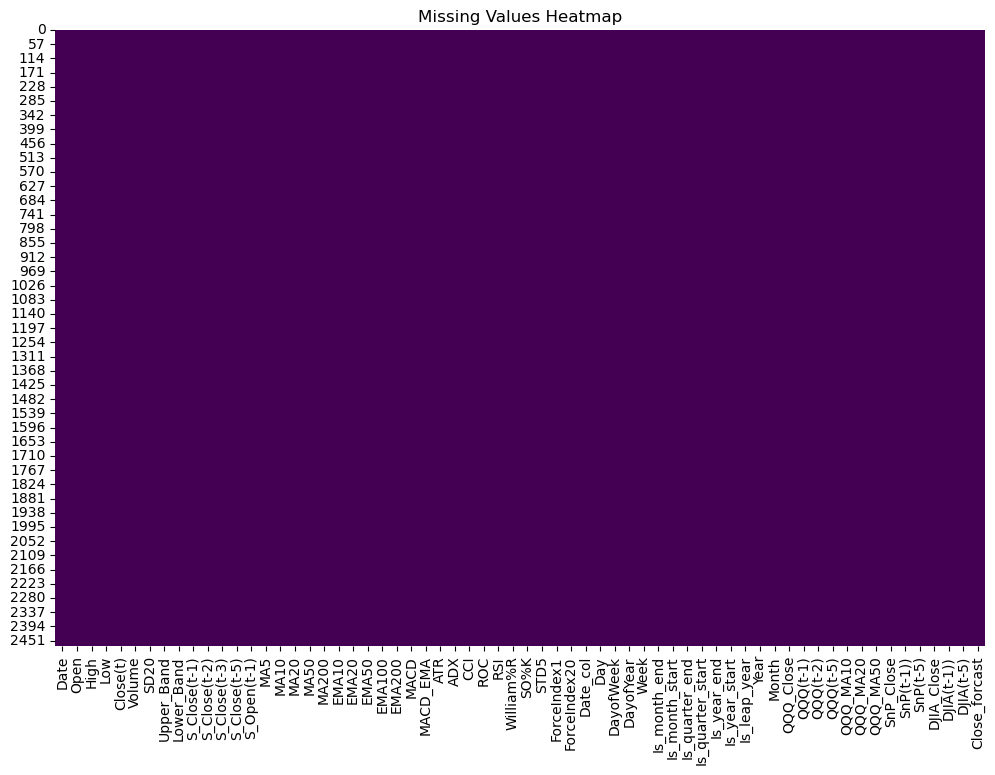

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_values = csv_file.isnull()

plt.figure(figsize=(12, 8))
sns.heatmap(missing_values, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

no missing values in the data csv file

<h2>Date Conversion</h2>

In [47]:
# Convert the 'Date' column to datetime
csv_file['Date'] = pd.to_datetime(csv_file['Date'])
csv_file['Date_col'] = pd.to_datetime(csv_file['Date_col'])

# new file
print(csv_file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2473 non-null   datetime64[ns]
 1   Open              2473 non-null   float64       
 2   High              2473 non-null   float64       
 3   Low               2473 non-null   float64       
 4   Close(t)          2473 non-null   float64       
 5   Volume            2473 non-null   int64         
 6   SD20              2473 non-null   float64       
 7   Upper_Band        2473 non-null   float64       
 8   Lower_Band        2473 non-null   float64       
 9   S_Close(t-1)      2473 non-null   float64       
 10  S_Close(t-2)      2473 non-null   float64       
 11  S_Close(t-3)      2473 non-null   float64       
 12  S_Close(t-5)      2473 non-null   float64       
 13  S_Open(t-1)       2473 non-null   float64       
 14  MA5               2473 n

date converted from object to datetime64[ns]

![image.png](attachment:image.png)
these columns were dropped since they are a form of redundant data 

CCI has no change in value (1333.33) hence it also is being dropped.



In [48]:
try:
 
    columns_to_remove = [
        'Day', 'DayofWeek', 'DayofYear', 'Week', 'Is_month_end', 'Is_month_start',
        'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
        'Is_leap_year', 'Year', 'Month'
    ]

    csv_file.drop(columns=columns_to_remove, inplace=True)

    csv_file.to_csv(file_processed, index=False)
    csv_file=pd.read_csv(file_processed)

    print("Columns removed successfully, and the modified DataFrame has been overwritten.")

except Exception as e:
    print("columns might be removed already and:\n", e)


Columns removed successfully, and the modified DataFrame has been overwritten.


<h2>Feature engineering <br>(creating new features from existing features)</h2>

In [49]:
csv_file['PV_Ratio'] = csv_file['Close(t)'] / csv_file['Volume']
csv_file['Relative_Strength_QQQ'] = csv_file['Close(t)'] / csv_file['QQQ_Close']

csv_file.to_csv(file_processed, index=False)
csv_file=pd.read_csv(file_processed)


<h2>(creating our custom target column)</h2>

In [50]:
target_name = f'Close(t+{n})'

csv_file[target_name] = csv_file['Close(t)'].shift(-n)

target_variable_created_above = target_name
# Now 'Close(t+n)' can be used as target for prediction

print(target_name+' column created')

Close(t+5) column created


<h2>Z-score standardisation</h2>

In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming you have your data in a DataFrame, 'df', and want to standardize specific columns
# Specify the columns you want to standardize
z_standardize = [
    'Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20', 'Upper_Band', 'Lower_Band', 'S_Close(t-1)',
    'S_Close(t-2)', 'S_Close(t-3)', 'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50',
    'MA200', 'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA', 'ATR', 'ADX', 'CCI',
    'ROC', 'RSI', 'William%R', 'SO%K', 'STD5', 'ForceIndex1', 'ForceIndex20', 'QQQ_Close', 'QQQ(t-1)',
    'QQQ(t-2)', 'QQQ(t-5)', 'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))', 'SnP(t-5)',
    'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast','PV_Ratio','Relative_Strength_QQQ',target_name
]
# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize columns in csv
csv_file[z_standardize] = scaler.fit_transform(csv_file[z_standardize])
csv_file.to_csv(file_processed, index=False)
csv_file=pd.read_csv(file_processed)

print('z-std complete')

z-std complete


<h2>Co-realation analysis</h2>

To reduce clutter and focus on relevant features, specific columns are selected for analysis

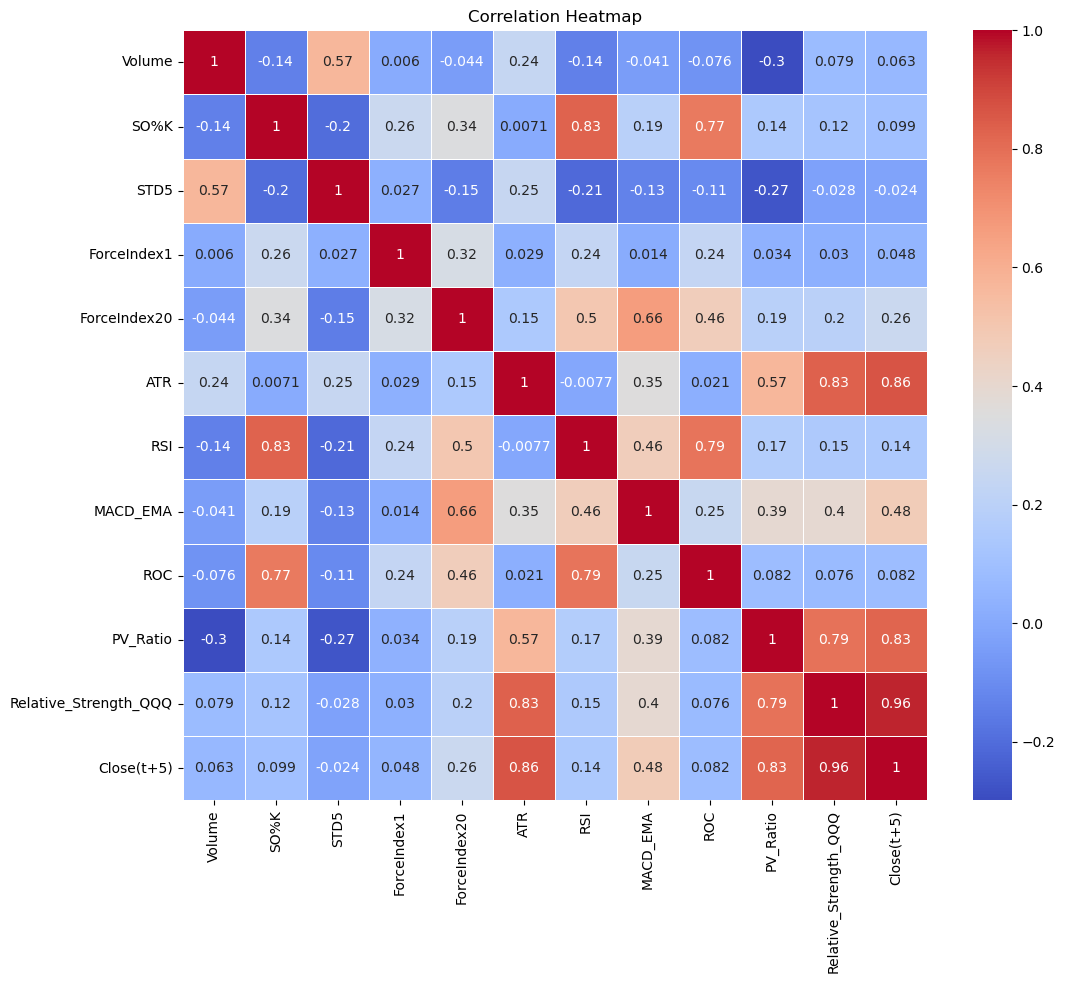

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a DataFrame, 'df'

# Specify the target variable and the features you want to consider for correlation-based selection
target_variable = target_variable_created_above

'''selected_features = [
    'Open', 'High', 'Low', 'Volume', 'SD20', 'Upper_Band', 'Lower_Band', 'S_Close(t-1)',
    'S_Close(t-2)', 'S_Close(t-3)', 'S_Close(t-5)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
    'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA', 'ATR', 'ADX', 'CCI',
    'ROC', 'RSI', 'William%R', 'SO%K', 'STD5', 'ForceIndex1', 'ForceIndex20',
]'''

selected_features = [
     'Volume', 'SO%K', 'STD5', 'ForceIndex1', 'ForceIndex20'
     , 'ATR', 'RSI','MACD_EMA','ROC', 'PV_Ratio','Relative_Strength_QQQ'
]

# Calculate the correlation between features and the target variable
correlations = csv_file[selected_features + [target_variable]].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


we observe that our added new features 'Relative_Strength_QQQ' and 'PV_Ratio' show good positive correlation with the target.

<h1>REGRESSION APPROACH</h1>


In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, precision_score
import matplotlib.pyplot as plt

In [54]:
selected_features_OLD = [
    'Open', 'High', 'Low', 'Volume', 'SD20', 'Upper_Band', 'Lower_Band', 'S_Close(t-1)',
    'S_Close(t-2)', 'S_Close(t-3)', 'S_Close(t-5)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
    'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA', 'ATR', 'ADX', 'CCI',
    'ROC', 'RSI', 'William%R', 'SO%K', 'STD5', 'ForceIndex1', 'ForceIndex20',
]

selected_features_MODIFIED = [
     'Volume', 'SO%K', 'STD5', 'ForceIndex1', 'ForceIndex20'
     , 'ATR', 'RSI','MACD_EMA','ROC'
]

selected_features= [
     'Volume', 'SO%K', 'STD5', 'ForceIndex1', 'ForceIndex20'
     , 'ATR', 'RSI','MACD_EMA','ROC', 'PV_Ratio','Relative_Strength_QQQ'
]



<b>since we have put forward a few days (n) there will be missing values in the end 'n' columns. therefore we need to exclude them in training and testing phase and use it only to predict afterwards</b>

In [55]:
target_variable = target_variable_created_above

csv_file = csv_file.iloc[:-n]

ML and testing part :

Mean Squared Error (MSE): 0.02
R-squared (R2): 0.97


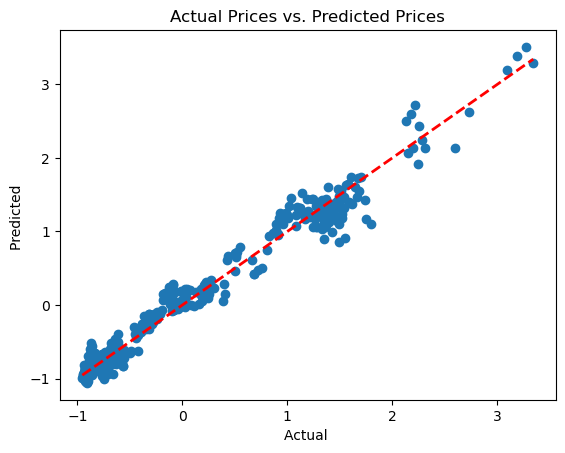

In [56]:
# ML training and testing in progress :)

X = csv_file[selected_features]
y = csv_file[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#test is split as 80 20.

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#to test model :
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


#visualise using scatterplot

plt.scatter(y_test, y_pred, label='predict values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal')

plt.xlabel("Actual ")
plt.ylabel("Predicted ")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()


<h2>Training- versus Test-Set Performance</h2>


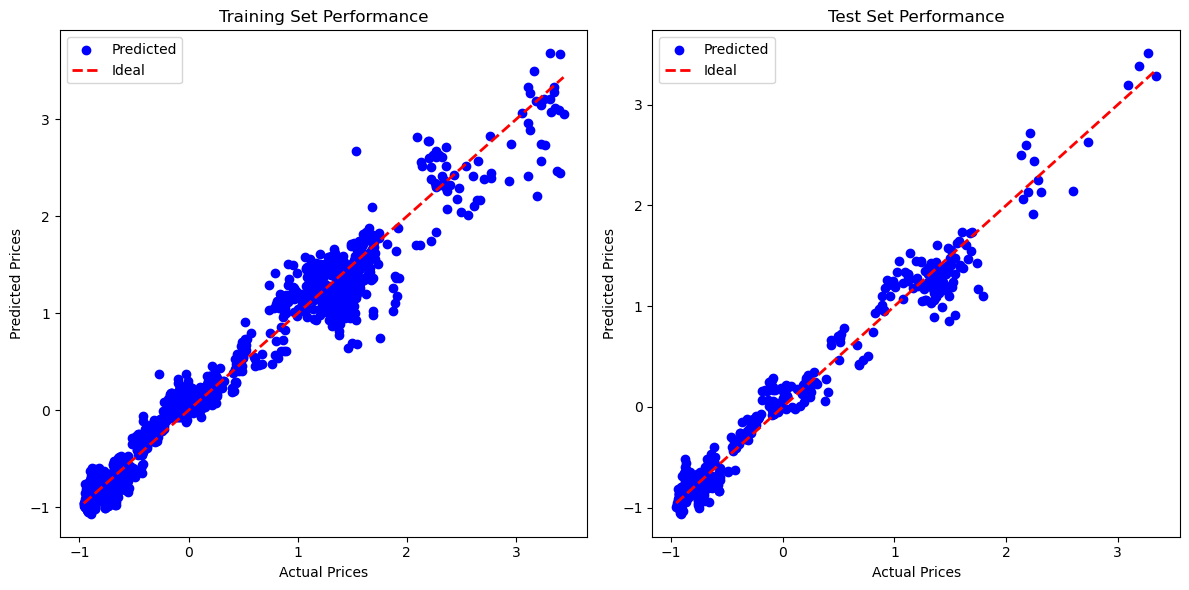

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(y_train, model.predict(X_train), color='blue', label='Predicted')
axes[0].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2, label='Ideal')
axes[0].set_title('Training Set Performance')
axes[0].set_xlabel('Actual Prices')
axes[0].set_ylabel('Predicted Prices')
axes[0].legend()

axes[1].scatter(y_test, y_pred, color='blue', label='Predicted')
axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal')
axes[1].set_title('Test Set Performance')
axes[1].set_xlabel('Actual Prices')
axes[1].set_ylabel('Predicted Prices')
axes[1].legend()

plt.tight_layout()
plt.show()

<h2>Value Prediction</h2>


Since we have moved our close(t) values by n days, i.e. close(t+n) we need to predict the n target values for the last n days in our dataset as follows:

In [58]:

last_rows = csv_file.iloc[-n:] 
X_last_row = last_rows[selected_features] #from selected columns


make prediction:

In [59]:
y_pred_last_row = model.predict(X_last_row)
#add to file
last_rows[target_variable] = y_pred_last_row

#print (last_rows)

In [60]:
print("Predicted values:")
for i, predicted_value in enumerate(y_pred_last_row):
    day = i + 1
    print(f"day-{day}: {predicted_value:.5f}")
predicted_values_dict = {}

#store for later
for i, predicted_value in enumerate(y_pred_last_row):
    day = i + 1
    predicted_values_dict[f"day-{day}"] = predicted_value

Predicted values:
day-1: 3.12052
day-2: 3.07952
day-3: 3.14399
day-4: 3.32912
day-5: 3.28797


<h1>Classification Approach</h1>

<h2>preprocessing</h2>

In [61]:
import pandas as pd
from matplotlib.pyplot import subplots, cm
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

file='FB.csv'
output_file='amazon.csv'

csv_file = pd.read_csv(file)

check missing values and change object to date datatype 

In [62]:
# Converting

csv_file['Date'] = pd.to_datetime(csv_file['Date'])
csv_file['Date_col'] = pd.to_datetime(csv_file['Date_col'])


In [63]:
# fix missing values if exists

csv_file.ffill(inplace=True) 
csv_file.bfill(inplace=True) 

dropping redundant data<br>
the following columns were dropped since they are a form of redundant data of date

'Day', 'DayofWeek', 'DayofYear', 'Week', 'Is_month_end', 'Is_month_start',
        'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
        'Is_leap_year', 'Year', 'Month'

CCI has no change in value (1333.33) hence it also is being dropped.



In [64]:
try:
 
    columns_to_remove = [
        'Day', 'DayofWeek', 'DayofYear', 'Week', 'Is_month_end', 'Is_month_start',
        'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
        'Is_leap_year', 'Year', 'Month', 'CCI'
    ]

    csv_file.drop(columns=columns_to_remove, inplace=True)

    csv_file.to_csv(output_file, index=False)
    csv_file=pd.read_csv(output_file)

    print("Columns removed successfully, and the modified DataFrame has been overwritten.")

except Exception as e:
    print("columns might be removed already and:\n", e)

Columns removed successfully, and the modified DataFrame has been overwritten.


Check the dataframe

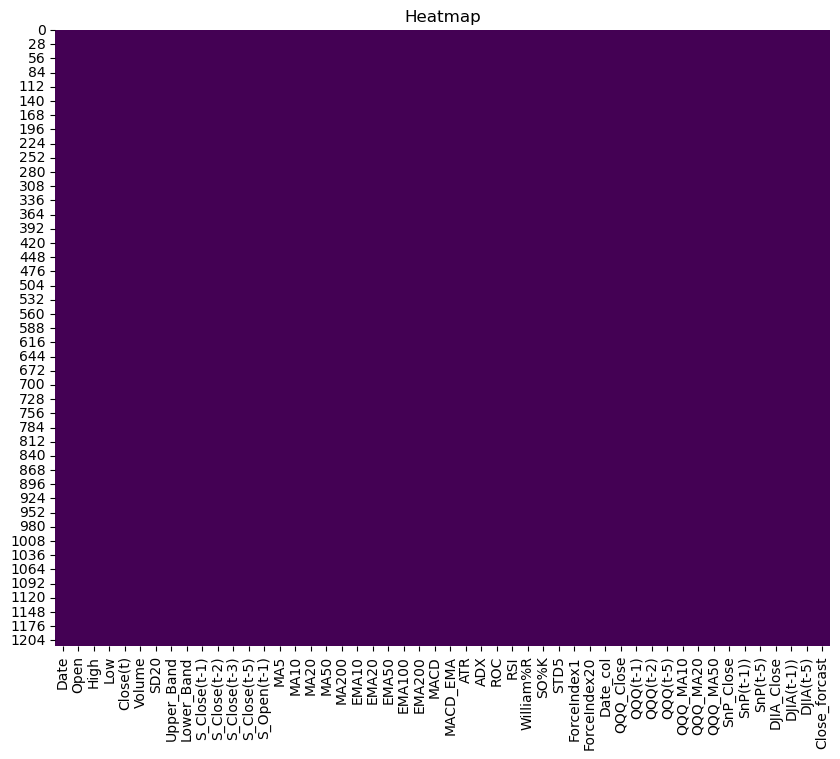

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1215 non-null   object 
 1   Open           1215 non-null   float64
 2   High           1215 non-null   float64
 3   Low            1215 non-null   float64
 4   Close(t)       1215 non-null   float64
 5   Volume         1215 non-null   int64  
 6   SD20           1215 non-null   float64
 7   Upper_Band     1215 non-null   float64
 8   Lower_Band     1215 non-null   float64
 9   S_Close(t-1)   1215 non-null   float64
 10  S_Close(t-2)   1215 non-null   float64
 11  S_Close(t-3)   1215 non-null   float64
 12  S_Close(t-5)   1215 non-null   float64
 13  S_Open(t-1)    1215 non-null   float64
 14  MA5            1215 non-null   float64
 15  MA10           1215 non-null   float64
 16  MA20           1215 non-null   float64
 17  MA50           1215 non-null   float64
 18  MA200   

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_values = csv_file.isnull()

plt.figure(figsize=(10, 8))
sns.heatmap(missing_values, cbar=False, cmap='viridis')
plt.title('Heatmap')
plt.show()

print(csv_file.info())

<h1>Feature Engineering:</h1>

creating a binary value to classify increase (1), decrease(-1) and same (0).

In [66]:
price_diff = csv_file['Close(t)'].shift(-n) - csv_file['Close(t)']  

csv_file['Price_Movement'] = price_diff.apply(lambda x: 1 if x > 0 else (2 if x < 0 else 0))

calculate Simple Moving Averages (SMA) for different time periods 

In [67]:
#5-days
csv_file['SMA-5'] = csv_file['Close(t)'].rolling(window=5).mean()

# 10-days
csv_file['SMA-10'] = csv_file['Close(t)'].rolling(window=10).mean()

Create future moved column for Price Movement:

In [68]:
future=f'Price_Movement(t+{n})'

#n = no. of days declared above
csv_file[future] = csv_file['Price_Movement'].shift(-n)


genrate QQQ using QQQ-close

In [69]:
csv_file['Relative_Strength_QQQ'] = csv_file['Close(t)'] / csv_file['QQQ_Close']

missing values handling incase generated after feature building

In [70]:
csv_file = csv_file.iloc[10:,]
#csv_file= csv_file.ffill()
csv_file.to_csv(output_file, index=False) #saving file
csv_file=pd.read_csv(output_file)


<h1>Model Implementation</h1>

<h2>SVM</h2>

Precision (Macro): 0.30
Accuracy: 0.6
Recall: 0.50


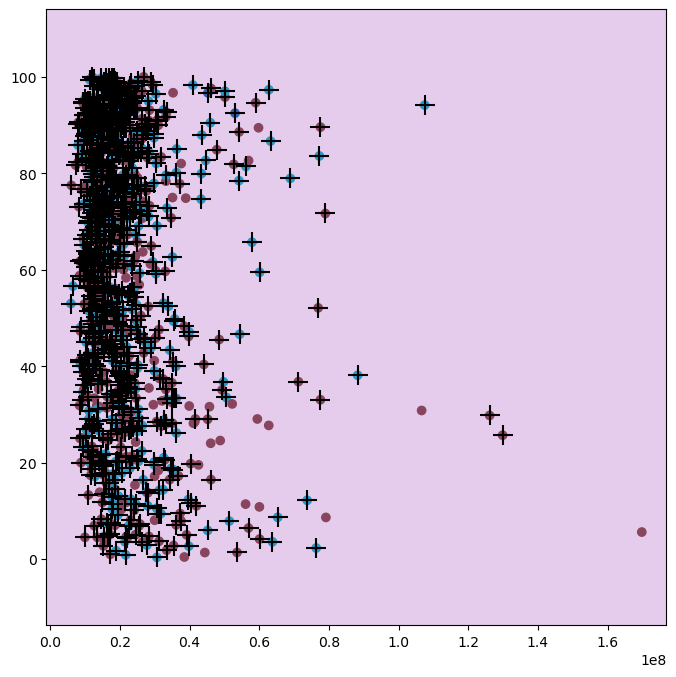

In [71]:
selected_columns= [
     'Volume', 'SO%K', 'STD5', 'ForceIndex1', 'ForceIndex20'
     , 'ATR', 'RSI','MACD_EMA','ROC', 'Relative_Strength_QQQ', 'SMA-5', 'SMA-10'
]

target= future

x=csv_file[selected_columns]
y=csv_file[target]


x = x.iloc[:-n]
y = y.iloc[:-n]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

C_value = 0.05

svm_model = SVC(C=C_value, kernel='poly')
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')

print(f"Precision (Macro): {precision:.2f}")

print("Accuracy:", accuracy)


recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,y_train,svm_model,ax=ax)

<b>Since Accuracy is too low (55%), we shall discover one more classification algorithm known as RandomForestClassifier</b>

<h2>Random Forest Classifier</h2>

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


selected_columns = [
    'Volume', 'SO%K', 'STD5', 'ForceIndex1', 'ForceIndex20',
    'ATR', 'RSI', 'MACD_EMA', 'ROC', 'Relative_Strength_QQQ', 'SMA-5', 'SMA-10'
]
target = future  # link to existing variable.

# Select features and target variable
x = csv_file[selected_columns]
y = csv_file[target]

#remove missing val rows generated
x = x.iloc[:-n]
y = y.iloc[:-n]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define a grid of hyperparameters to search
'''
p_grid={
'n_estimators': [100, 200, 300]  
'max_depth': [None, 10, 20, 30]
'min_samples_split': [2, 5, 10]
}
'''
    
#changed
parameter_grid = {
    'n_estimators': [100],  # changed to hyper tuned values to reduce time complexity
    'max_depth': [30],  
    'min_samples_split': [10], 
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_model, parameter_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [30], 'min_samples_split': [10],
                         'n_estimators': [100]},
             scoring='accuracy', verbose=1)

In [73]:
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']

best_rf_model = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')

print(f"Precision (Macro): {precision:.2f}")

print("Random Forest Accuracy:", accuracy)

recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

print("Best Hyperparameters - n_estimators:", best_n_estimators, "max_depth:", best_max_depth, "min_samples_split:", best_min_samples_split)


Precision (Macro): 0.73
Random Forest Accuracy: 0.7166666666666667
Recall: 0.67
Best Hyperparameters - n_estimators: 100 max_depth: 30 min_samples_split: 10


<h2>final prediction step</h2>

In [74]:
last_rows = csv_file.iloc[-n:]
X_last_row = last_rows[selected_columns]  # Select last 'n' rows

y_pred_last_row = best_rf_model.predict(X_last_row)

last_rows[target] = y_pred_last_row

average_prediction = last_rows[target].mean()

if average_prediction > 0:
    market = "BULLISH (good time to buy)"
elif average_prediction < 0:
    market = "BEARISH (good time to sell)"
else:
    market = "neutral"

print("Predicted values:", end=" ")
for i, predicted_value in enumerate(y_pred_last_row):
    day = i + 1
    print(f"day-{day}: {predicted_value:.5f},", end=" ")

print("\n\n\nOverall market:", market)


Predicted values: day-1: 1.00000, day-2: 2.00000, day-3: 2.00000, day-4: 2.00000, day-5: 2.00000, 


Overall market: BULLISH (good time to buy)


<h1>CLUSTERING APPROACH</h1>

so in clustering approach we need to identifiy any kind of outliners first. we can achive that using visualization techniques

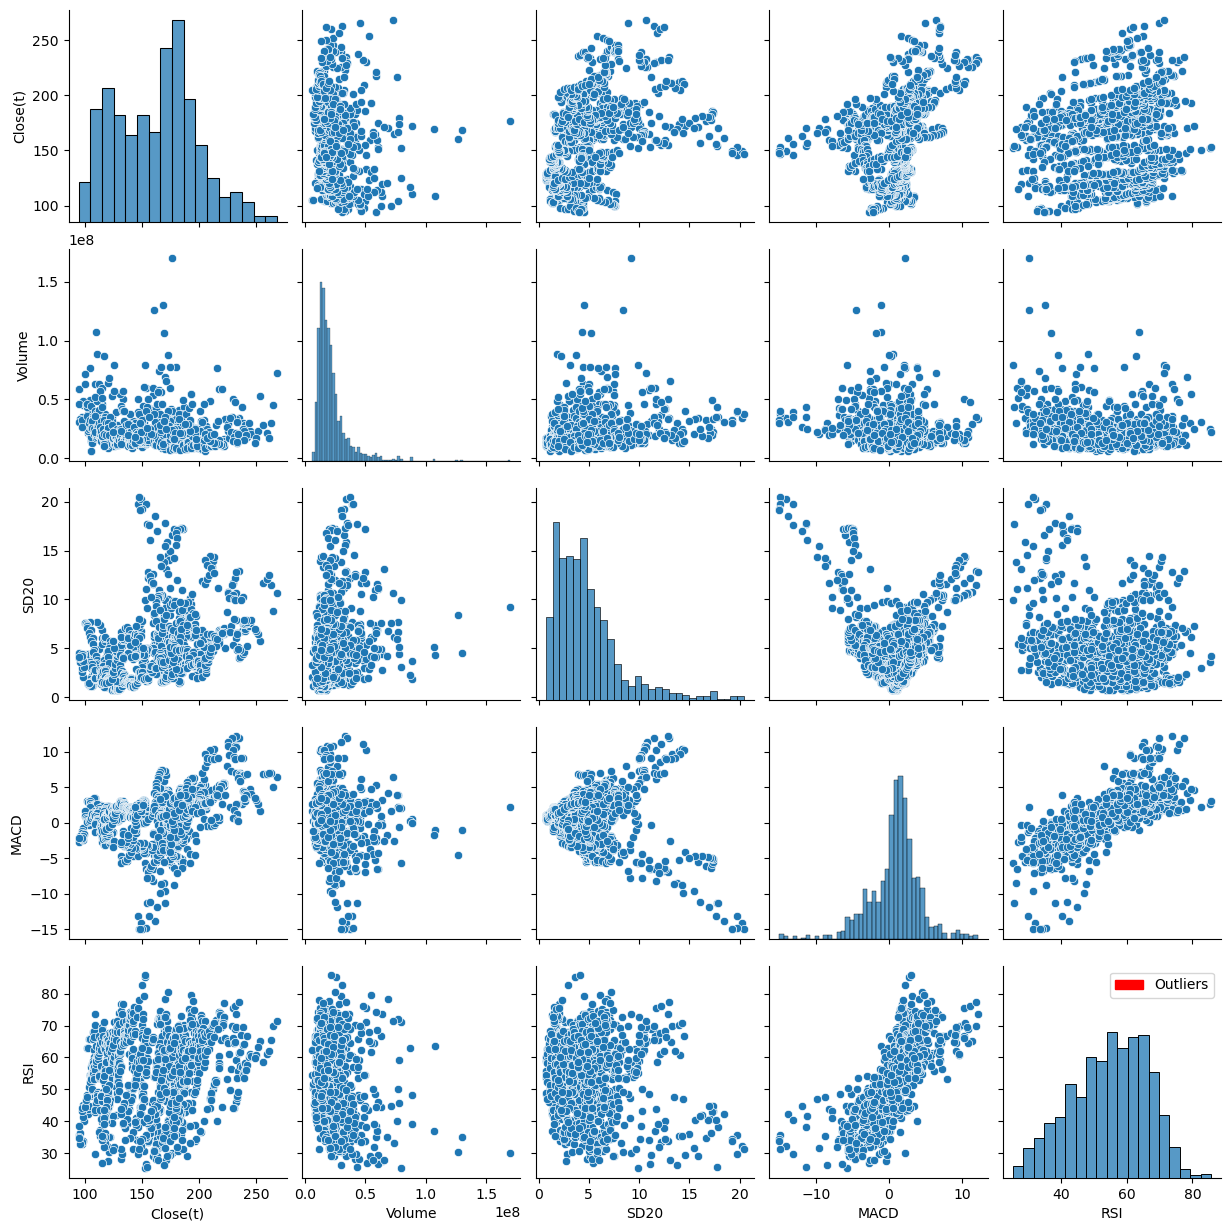

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

selected_features = ["Close(t)", "Volume", "SD20", "MACD", "RSI"]

scatterplot = sns.pairplot(data=csv_file[selected_features])

for ax in scatterplot.axes.flat:
    ax.scatter([], [], c="red", s=30, label="Outliers")

custom_legend = [mpatches.Patch(color='red', label='Outliers')]

plt.legend(handles=custom_legend, loc="upper right")
plt.show()


as we observe there are little to no outliners that can be seen in the scatter plats of the selected columns. but yet let us perform

<h2>Z-score standardization</h2>

In [76]:
from scipy import stats
import pandas as pd

numerical_features = ["Close(t)", "Volume", "SD20", "MACD", "RSI"]

z_scores = stats.zscore(csv_file[numerical_features])
z_score_df = pd.DataFrame(z_scores, columns=numerical_features)

# Set a Z-score limit
threshold = 3
columns_to_remove = z_score_df.columns[(z_score_df > threshold).any()]

print("Z-scores for selected features:")
print(z_score_df)

csv_file_filtered = csv_file.drop(columns=columns_to_remove)

print("\nDataFrame after removing columns with high Z-scores:")
print(csv_file_filtered)


Z-scores for selected features:
      Close(t)    Volume      SD20      MACD       RSI
0    -1.676997  0.839122 -0.125046  0.628742  0.725924
1    -1.639471  0.152756 -0.100083  0.623273  0.962982
2    -1.659914 -0.047120 -0.125447  0.592075  0.725339
3    -1.621829  1.561604 -0.158313  0.589651  0.972201
4    -1.486850  2.992034 -0.099073  0.690215  1.644176
...        ...       ...       ...       ...       ...
1200  2.984822  3.679804  1.799214  1.613267  1.436658
1201  2.832481  0.604743  2.054027  1.781792  0.919421
1202  2.640094  0.459229  2.127271  1.731005  0.340639
1203  2.745388 -0.033658  2.245797  1.756036  0.544377
1204  2.784874 -0.327096  2.365837  1.785563  0.620245

[1205 rows x 5 columns]

DataFrame after removing columns with high Z-scores:
            Date    Open    High     Low  Close(t)  Upper_Band  Lower_Band  \
0     2015-10-30  104.51  104.72  101.65    101.97  106.447748   88.935252   
1     2015-11-02  101.72  103.47  101.18    103.31  107.075800   89.23720

In [77]:
print(csv_file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1205 non-null   object 
 1   Open                   1205 non-null   float64
 2   High                   1205 non-null   float64
 3   Low                    1205 non-null   float64
 4   Close(t)               1205 non-null   float64
 5   Volume                 1205 non-null   int64  
 6   SD20                   1205 non-null   float64
 7   Upper_Band             1205 non-null   float64
 8   Lower_Band             1205 non-null   float64
 9   S_Close(t-1)           1205 non-null   float64
 10  S_Close(t-2)           1205 non-null   float64
 11  S_Close(t-3)           1205 non-null   float64
 12  S_Close(t-5)           1205 non-null   float64
 13  S_Open(t-1)            1205 non-null   float64
 14  MA5                    1205 non-null   float64
 15  MA10

as you can see in the above table the z-score threshold has managed to delet the columns that was higher than 3 and hence our data size has also reduced by 40%

In [78]:
csv_file.to_csv(output_file, index=False) #saving file
csv_file=pd.read_csv(output_file)

<h2>APPLYING K-Means Algorithm</h2>

To perform K-Means clustering on the dataset scaling is necessary

In [79]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


we shall also manually select the features by trial and error method

In [80]:
numerical_features = [
    "Close(t)", "Volume", "SD20", "MACD", "RSI",
]

Data scaling:

In [81]:

scaler = StandardScaler()
csv_file[numerical_features] = scaler.fit_transform(csv_file[numerical_features])

number of clusters will be set to 3 so that it becomes easier to determine BULLISH/BEARISH/Neutral

In [82]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

csv_file["Cluster"] = kmeans.fit_predict(csv_file[numerical_features])

visualizing the clusters using Matplotlib and Seaborn

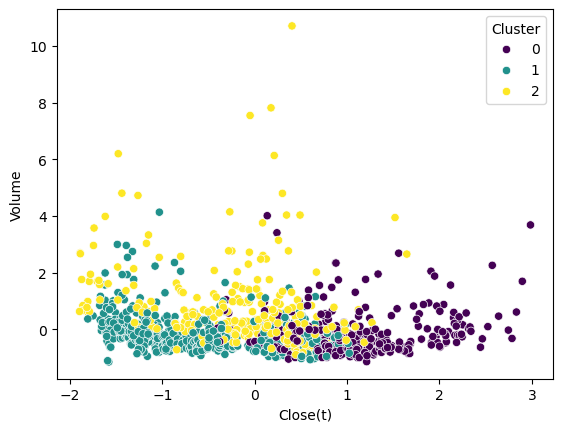

In [83]:

sns.scatterplot(x="Close(t)", y="Volume", hue="Cluster", data=csv_file, palette="viridis")
plt.show()


the above plot shows us the plot with close(t) but we need it for close (t+n) hence let us plot it against t+n

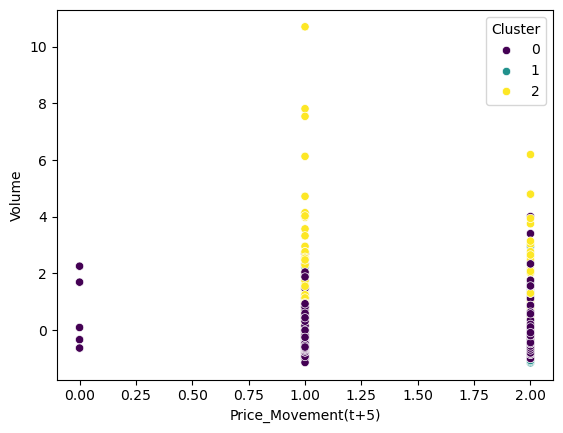

In [84]:
sns.scatterplot(x=future, y="Volume", hue="Cluster", data=csv_file, palette="viridis")
plt.show()


In [85]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


data=csv_file



now let us setup the clusters as target and assign them to randomForest classifier

In [86]:
kmeans = KMeans(n_clusters=3)
data["Cluster"] = kmeans.fit_predict(data[numerical_features])

X = data[numerical_features]
y = data["Cluster"]  # Cluster labels as the target variable



In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9626556016597511


K-Means clustering has been used to create cluster labels and then apply a Random Forest classifier to predict the cluster labels based on the original features

<h1>USER END USEAGE:</h1>

In [88]:
print("Predicted values by regression:")
for day, predicted_value in predicted_values_dict.items():
    print(f"{day}: {predicted_value:.5f}\n")
    
print("\n\n\nOverall market trend via classification:\n", market)


Predicted values by regression:
day-1: 3.12052

day-2: 3.07952

day-3: 3.14399

day-4: 3.32912

day-5: 3.28797




Overall market trend via classification:
 BULLISH (good time to buy)
